In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

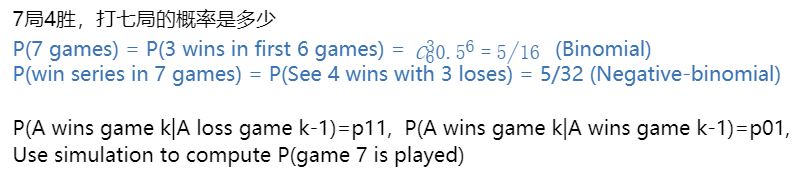

In [2]:
p=0.5
p_01=0.6
p_11=0.4

def who_wins(p):
    u=np.random.rand()
    return u>p
    

def game():
    n=0
    A_win=0
    B_win=0
    A_last_game=None
    
    while True:        
        if A_last_game is None:
            A_last_game = who_wins(p)
        elif A_last_game==1:
            A_last_game = who_wins(p_01)
        else:
            A_last_game = who_wins(p_11)
        
        n=n+1
        A_win+=A_last_game
        B_win+=1-A_last_game
        
        if A_win==4 or B_win==4:
            return n

In [3]:
sum([game()//7 for i in range(1000)])/1000

0.384

In [4]:
int(True)

1

## 模拟 dice

In [5]:
values = [1, 2, 3, 4, 5, 6]
probs = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]
sample = np.random.choice(values, p=probs)

In [6]:
dice_roll = np.random.randint(1, 7)
dice_roll

5

## 模拟硬币
* https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

In [7]:
def coin_flip(p=0.5):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p) 
       
    #return flip to be added to numpy array    
    return result

coin_flip()

1

In [8]:
n = 1
p = 0.5
np.random.binomial(n,p)

0

## 用biased coin生成uniform discrete number

### (1) 先用 biased coin 弄到 fair coin, 想大于 rand_2()
### (2) 再用 rand_2 to rand_n

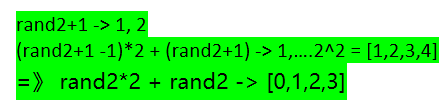

In [47]:
import math

def flip(p=0.7):
    if np.random.rand()<=p:
        return 1
    else:
        return 0
    
def rand2():
    while True:
        a=flip()
        b=flip()
        
        if a^b:
            return a # [0, 1]
        # rand2() + 1 -> [1, 2]

def du(n):
    M = int(np.log2(n)) + 1
    print(M)
    
    while True:
        r=0
        for i in range(M):
            r+=rand2()*(2**i) # 一直往上 
            
            # 0
            # + rand2()*(2**0) -> [0, 1]
            # + rand2()*(2**1) -> [0, 2] -> [0, 1, 2, 3]
            # + rand2()*(2**2) -> [0, 4] -> [1, 2, 3, 4, 5, 6, 7]
        
        if r<=n:
            return r

In [48]:
du(10)

4


0

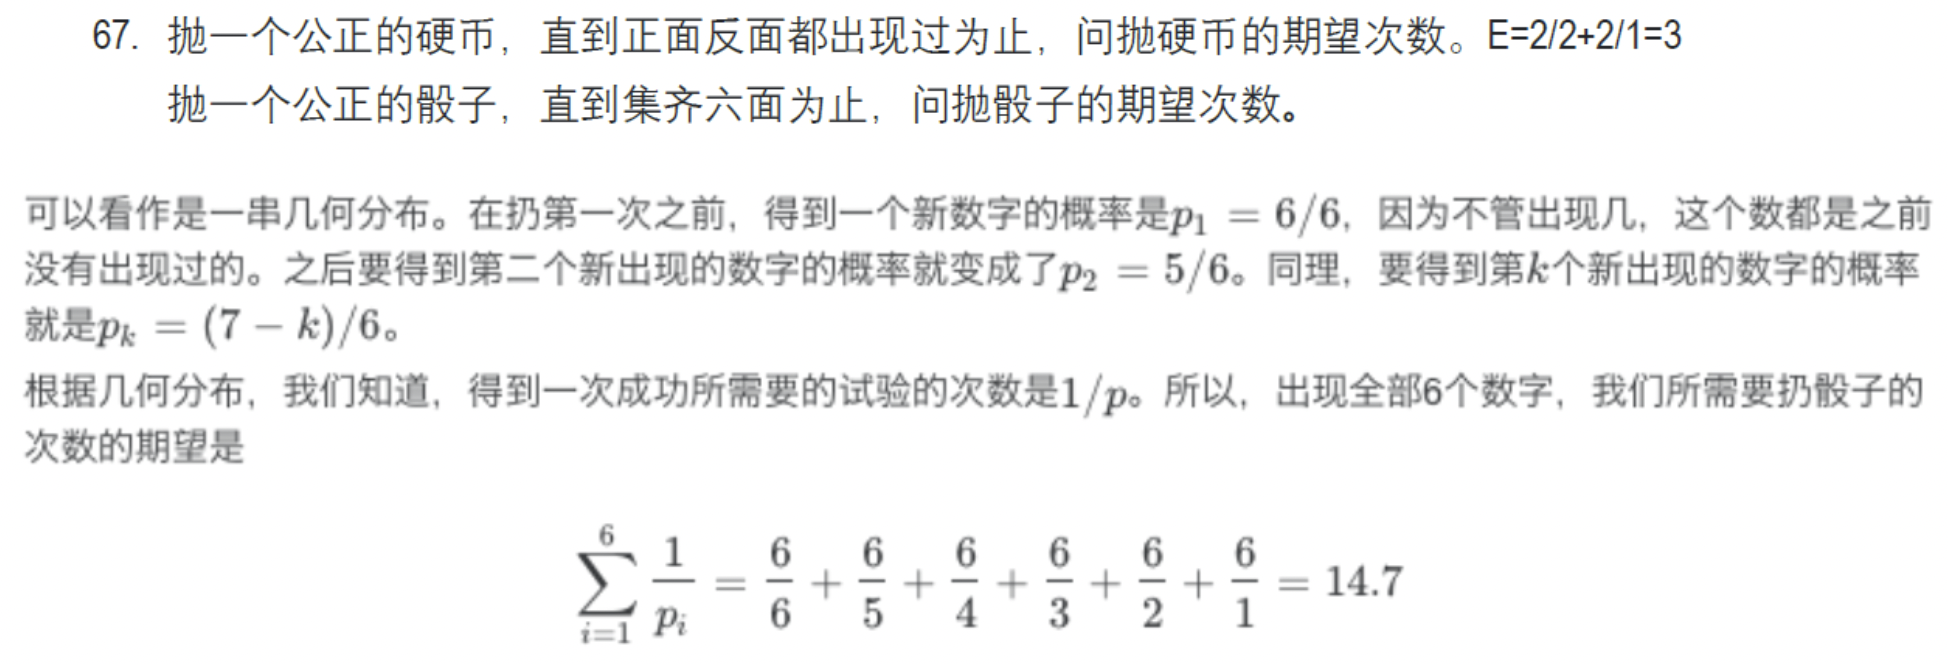

6个fair coin，每天扔一次，直到6个面都H朝上（前一天H朝上的不再扔），求期望多少天能完成游戏；Intuitively是多少天；Python写模拟过程；从这个过程和数据pattern来看，你有什么启发？?

(array([1.766e+03, 4.993e+03, 1.505e+03, 1.304e+03, 2.390e+02, 1.360e+02,
        4.500e+01, 5.000e+00, 4.000e+00, 3.000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

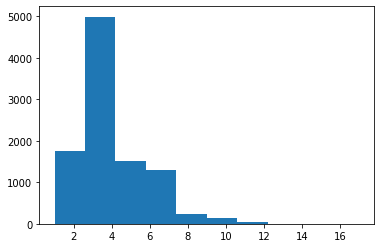

In [9]:
def simulate_days():
    remain = 6 # remain count not H
    days = 0
    while remain > 0:
        days += 1
        N = remain
        for i in range(N):
            result = coin_flip()
            if result == 1: # head
                remain -= 1
            if remain == 0:
                break
        
    return days

days_list = []
for i in range(10000):
    days = simulate_days()
    days_list.append(days)

plt.hist(days_list)

In [10]:
np.mean(days_list)

4.0289

In [11]:
np.median(days_list)

4.0

* https://www.1point3acres.com/bbs/interview/google-data-science-565499.html

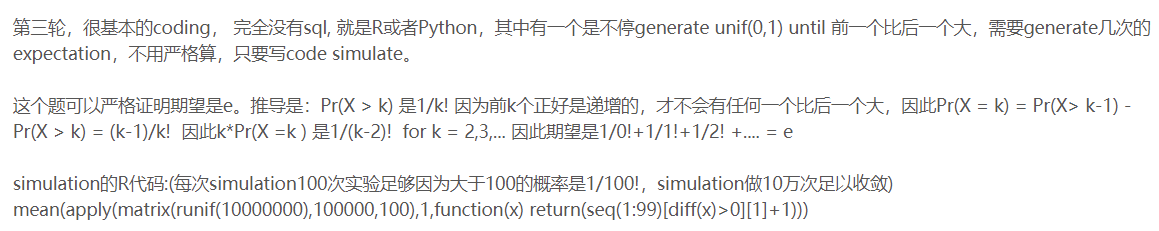

 X_(0) < .... X_(k-1) > X_(k)

In [12]:
import numpy as np

In [13]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
np.random.uniform(0,1,10)

array([0.81647438, 0.51803116, 0.4044949 , 0.77626716, 0.94862092,
       0.74479864, 0.89100742, 0.75348247, 0.24885668, 0.1176773 ])

In [14]:
np.random.uniform(0,1)

0.7170444050933995

In [15]:
nums = []

def get_uniform_bigger():
    # get first num
    count = 1
    cur_num = np.random.uniform(0,1)
    
    while True:
        new_num = np.random.uniform(0,1)
        count += 1
        if new_num < cur_num:
            break
        else:
            cur_num = new_num
            
    return count

counts = []
for i in range(10000):
    count = get_uniform_bigger()
    counts.append(count)
    
np.mean(counts)

2.7057

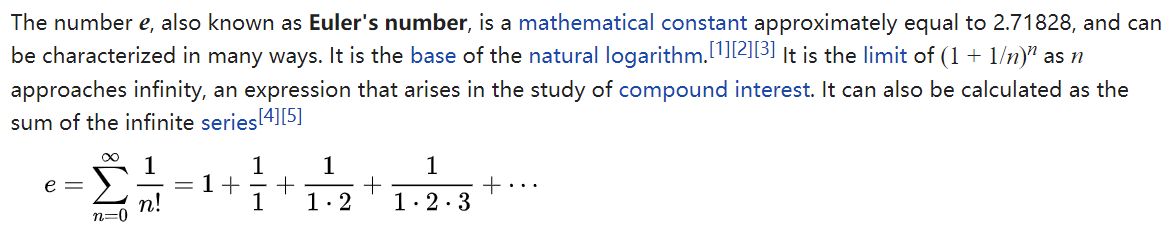

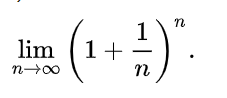 2.71828

### Correlated linear regression

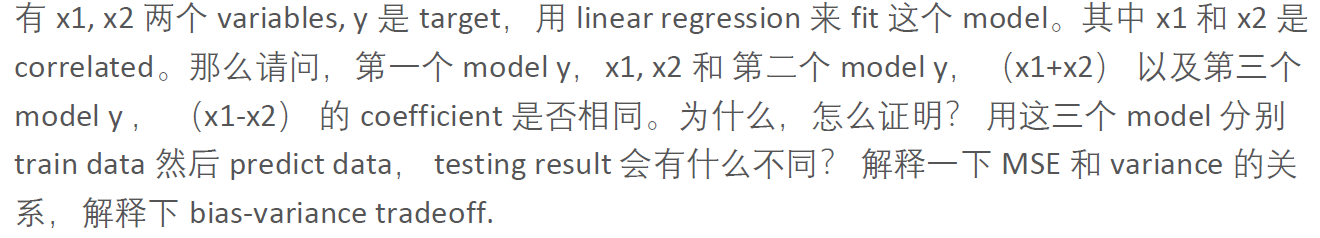

* https://stats.stackexchange.com/questions/83172/generate-two-variables-with-precise-pre-specified-correlation

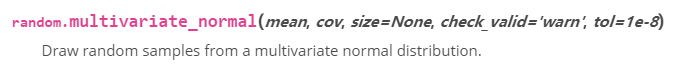

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

* 

In [16]:
nsample = 500
r = 0.9

# Generate pearson correlated data with approximately cor(X, Y) = r
import numpy as np
data = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], size=nsample)
x1, x2 = data[:,0], data[:,1]

data.shape
# That's it! Now let's take a look at the actual correlation:
# import scipy.stats as stats
# print('r=', stats.pearsonr(x1, x2)[0])

(500, 2)

In [17]:
x12_sum = x1 + x2
x12_diff = x1 - x2
e = np.random.normal(size=nsample)

y = 0.7*x1 + 0.3*x2 + 5 + e

In [18]:
import statsmodels.api as sm

X = np.column_stack((x1, x2))
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     231.7
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           7.87e-72
Time:                        22:56:53   Log-Likelihood:                -689.91
No. Observations:                 500   AIC:                             1386.
Df Residuals:                     497   BIC:                             1398.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0109      0.043    116.157      0.0

In [19]:
import statsmodels.api as sm

X = np.column_stack((x12_sum, x12_diff))
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     231.7
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           7.87e-72
Time:                        22:56:53   Log-Likelihood:                -689.91
No. Observations:                 500   AIC:                             1386.
Df Residuals:                     497   BIC:                             1398.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0109      0.043    116.157      0.0

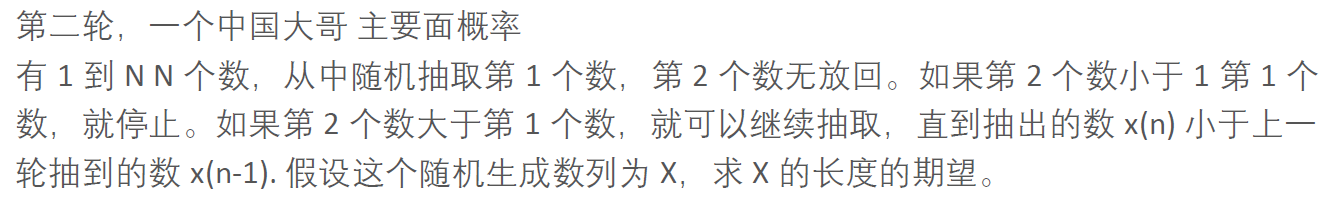

* https://en.wikipedia.org/wiki/E_(mathematical_constant)

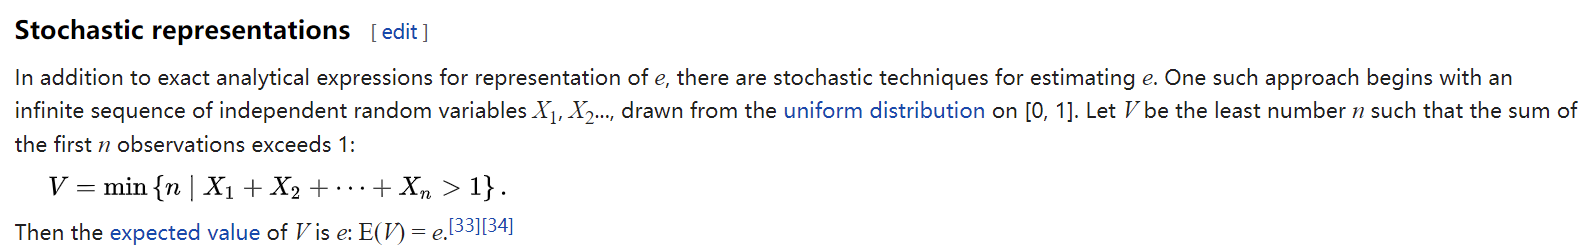

In [20]:
def simulate_x(n):
    arr = [i+1 for i in range(n)] # 1 -> n
    
    num1 = np.random.choice(arr)
    arr.remove(num1)
    
    num2 = np.random.choice(arr)
    arr.remove(num2)
    
    count = 2
    x_arr = [num1, num2]
    
    while num2 > num1: # if num2 < num1, stop
        num1 = num2 # update num1
        num2 = np.random.choice(arr) # get new num2
        arr.remove(num2)
        
        x_arr.append(num2)
        
        count += 1
            
#     print(x_arr)
    return count
    
res = []
for i in range(100000):
    count = simulate_x(100) # N=100
    res.append(count)



In [21]:
np.mean(res)

2.71704

### Coding. 生成 1000*2 矩阵: 第一列是按一定概率分布的categorical variables，第二列是正态分布的随机数。然后去除所有第二列小于1的行，再把第二列的数按第一列的categorical variable分类做归一化。不涉及算法


* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.


* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


* However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.


In [24]:
data={
    'a':np.random.binomial(1,0.2,1000),
    'b':np.random.normal(0,1,1000)
}
# Or use np.random.choice(3,10,[0.1,0.2,0.7])
df=pd.DataFrame(data=data)
df=df.loc[df.b>=1].reset_index(drop=True)
df.head()

,a,b
0,0,1.773100
1,0,2.345643
2,0,1.964880
3,0,1.020164
4,0,1.885781


In [26]:
# Normalization: rescale to range of [0,1]
df.groupby('a').transform(lambda x: (x-x.min())/(x.max()-x.min()))

# Standardization: rescale to have mean=0 and std=1
df.groupby('a').transform(lambda x: (x-x.mean())/x.std())

df.head()

,a,b
0,0,1.773100
1,0,2.345643
2,0,1.964880
3,0,1.020164
4,0,1.885781
